In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data into dataframe and remove first row
df = pd.read_csv('list_df.csv')
df.drop(df.index[[0]], inplace=True)
df.head(5)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,adult,backdrop_path,genre_ids,id,media_type,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,list_id
1,1,False,/kaIfm5ryEOwYg8mLbq8HkPuM1Fo.jpg,"[28, 12, 35, 14, 878]",284053,movie,en,Thor: Ragnarok,Thor is imprisoned on the other side of the un...,136.745,/rzRwTcFvttcN1ZpX2xv4j3tSdJu.jpg,2017-10-25,Thor: Ragnarok,False,7.6,16592,1
2,2,False,/tTlAA0REGPXSZPBfWyTW9ipIv1I.jpg,"[28, 12, 878, 18]",315635,movie,en,Spider-Man: Homecoming,Following the events of Captain America: Civil...,247.357,/c24sv2weTHPsmDa7jEMN0m2P3RT.jpg,2017-07-05,Spider-Man: Homecoming,False,7.4,16969,1
3,3,False,/aJn9XeesqsrSLKcHfHP4u5985hn.jpg,"[12, 28, 878, 35]",283995,movie,en,Guardians of the Galaxy Vol. 2,The Guardians must fight to keep their newfoun...,91.837,/y4MBh0EjBlMuOzv9axM4qJlmhzz.jpg,2017-04-19,Guardians of the Galaxy Vol. 2,False,7.6,17261,1
4,4,False,/c71zkXAykw5uu4cHnUCE6vA3NY0.jpg,"[28, 18, 878]",263115,movie,en,Logan,"In the near future, a weary Logan cares for an...",82.37,/fnbjcRDYn6YviCcePDnGdyAkYsB.jpg,2017-02-28,Logan,False,7.8,16126,1
5,5,False,/aL53oMdZKZRJRH8txH07DLuleF9.jpg,"[28, 12, 14, 878]",284052,movie,en,Doctor Strange,"After his career is destroyed, a brilliant but...",137.959,/xf8PbyQcR5ucXErmZNzdKR0s8ya.jpg,2016-10-25,Doctor Strange,False,7.4,17616,1


In [11]:
num_unique_genres = df['genre_ids'].nunique()
print("genres", num_unique_genres)
df = df.astype({"popularity": float, "vote_average": float, "vote_count": float})

genres 4560


In [20]:
df['popularity'].mean()
df.shape

(2656219, 17)

In [14]:
# Get movie and list counts
num_unique_lists = df['list_id'].nunique()
num_unique_movies = df['original_title'].nunique()

# Get unique movie titles for creating our NxN matrix
unique_movie_titles = df['original_title'].unique()
movies_df = pd.DataFrame(np.zeros((num_unique_movies, num_unique_movies)))
#movies_df = pd.DataFrame(0, index=np.arange(num_unique_movies), columns=unique_movie_titles)
movies_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,48390,48391,48392,48393,48394,48395,48396,48397,48398,48399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print("number of unique lists:", num_unique_lists)
print("number of unique movie titles:", num_unique_movies)

unique_list_ids = df['list_id'].unique()


number of unique lists: 11058
number of unique movie titles: 48400


In [39]:
# Create a move dictionary which will store a dictionary for each movie
# to keep track of associated movie counts
movie_dict = {}

for k in range(num_unique_lists):
    
    # Get the current list id
    current_list_id = unique_list_ids[k]
    
    # Get the unique movie titles in the list to avoid double counting within a list
    unique_movies = df[df['list_id'] == str(current_list_id)]['original_title'].unique()
    
    # Get the number of unique movies for iteration
    len_movies = unique_movies.shape[0]

    # Enumerate through each movie in the list
    # This first loop is to treat each movie as the primary movie in the list
    for i in range(len_movies):

        # Get the name of the primary movie
        current_movie_title = unique_movies[i]

        # Create a dictionary for the primary movie to store associated movie counts
        if movie_dict.get(current_movie_title, "NA") == "NA":
            movie_dict[current_movie_title] = {}

        # Enumerate through each associated move in the list
        # This second loop is to treat each movie as an associated movie with the primary movie from the outer loop
        for j in range(len_movies):

            # Get the name of the associated movie with the primary movie
            associated_movie_title = unique_movies[j]

            # Make sure we aren't counting a movie being in a list with itself
            if current_movie_title != associated_movie_title:

                # Update the associated movie count
                if movie_dict[current_movie_title].get(associated_movie_title, "NA") == "NA":
                    movie_dict[current_movie_title][associated_movie_title] = 1
                else:
                    movie_dict[current_movie_title][associated_movie_title] += 1
                    


In [88]:
# Show sample output
movie_dict['Avatar']
dict_keys = list(movie_dict.keys())
print(len(dict_keys))

final_df.shape

5121


(5121, 48402)

In [97]:
# Get dictionary keys and info for creating final dataframe of counts
dict_keys = list(movie_dict.keys())
len_keys = len(dict_keys)
df_cols = list(unique_movie_titles)
df_cols.insert(0,'Primary_Movie_Title')

# Create final dataframe
#final_df = pd.DataFrame(np.zeros(shape=(len_keys,len(df_cols))), columns = df_cols)
final_df = pd.DataFrame(np.zeros(shape=(len_keys,len_keys)), columns = list(dict_keys))
final_df['Primary_Movie_Title'] = dict_keys

# Enumerate through each of the primary movies
for i in range(len_keys):
    
    primary_title = dict_keys[i]
    
    # Get the list of associated movies
    related_movie_keys = list(movie_dict[primary_title].keys())
    len_related_movies = len(related_movie_keys)
    
    # Add associated movie counts to final data frame
    for j in range(len_related_movies):
        
        related_title = related_movie_keys[j]
        related_count = movie_dict[primary_title][related_title]
        final_df[related_title].where(final_df['Primary_Movie_Title'] != primary_title, related_count, inplace=True)
    
final_df.head(5)

,Thor: Ragnarok,Spider-Man: Homecoming,Guardians of the Galaxy Vol. 2,Logan,Doctor Strange,X-Men: Apocalypse,Captain America: Civil War,Deadpool,Fantastic Four,Ant-Man,...,Hamilton - I nationens intresse,Hamilton 2 - Men inte om det gäller din dotter,Haarautuvan rakkauden talo,Fireflies in the Garden,Elokuu,Studio Sex,En plats i solen,Exam,Evening,Primary_Movie_Title
0,0.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thor: Ragnarok
1,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spider-Man: Homecoming
2,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Guardians of the Galaxy Vol. 2
3,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Logan
4,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Doctor Strange


In [98]:
#movie_dict['Thor: Ragnarok']
final_df.shape

(5121, 5122)

In [99]:
# write final data output
final_df.to_csv("movie_list_counts_optimized.csv")

In [101]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Thor: Ragnarok,5121.0,0.082015,0.299594,0.0,0.0,0.0,0.0,3.0
Spider-Man: Homecoming,5121.0,0.080258,0.287097,0.0,0.0,0.0,0.0,2.0
Guardians of the Galaxy Vol. 2,5121.0,0.082796,0.298071,0.0,0.0,0.0,0.0,3.0
Logan,5121.0,0.080258,0.287097,0.0,0.0,0.0,0.0,2.0
Doctor Strange,5121.0,0.084749,0.297522,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
Elokuu,5121.0,0.080453,0.272020,0.0,0.0,0.0,0.0,1.0
Studio Sex,5121.0,0.080453,0.272020,0.0,0.0,0.0,0.0,1.0
En plats i solen,5121.0,0.080453,0.272020,0.0,0.0,0.0,0.0,1.0
Exam,5121.0,0.080453,0.272020,0.0,0.0,0.0,0.0,1.0


# Get Data Statistics

This section of the notebook grabs some statistics around our cleaned labled data which is movie counts. 

In [116]:
# Read in the data
movie_metrics_df = pd.read_csv("movie_list_counts_optimized.csv")
movie_metrics_df.drop(columns='Unnamed: 0', inplace = True)  
movie_metrics_df.head(10)

,Thor: Ragnarok,Spider-Man: Homecoming,Guardians of the Galaxy Vol. 2,Logan,Doctor Strange,X-Men: Apocalypse,Captain America: Civil War,Deadpool,Fantastic Four,Ant-Man,...,Hamilton - I nationens intresse,Hamilton 2 - Men inte om det gäller din dotter,Haarautuvan rakkauden talo,Fireflies in the Garden,Elokuu,Studio Sex,En plats i solen,Exam,Evening,Primary_Movie_Title
0,0.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thor: Ragnarok
1,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spider-Man: Homecoming
2,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Guardians of the Galaxy Vol. 2
3,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Logan
4,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Doctor Strange
5,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,X-Men: Apocalypse
6,3.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Captain America: Civil War
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Deadpool
8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fantastic Four
9,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ant-Man


In [122]:
# Get max row values
movie_counts = list(movie_metrics_df.max(axis=1))

In [126]:
movie_counts.sort(reverse = True)

In [174]:
print("max:", max(movie_counts))
print("min:", min(movie_counts))
print("avg:", st.mean(movie_counts))
print("median:", st.median(movie_counts))
print("variance:", st.variance(movie_counts))
ls = [x for x in movie_counts if x ==0]
print(len(ls))

max: 20.0
min: 0.0
avg: 1.789884788127319
median: 1.0
variance: 3.125374225004882
11


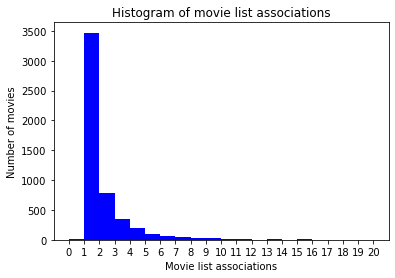

In [170]:

plt.hist(movie_counts,
         bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
         histtype='bar',
         facecolor='b',
         alpha=1)

plt.xlabel('Movie list associations')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylabel('Number of movies')
plt.title('Histogram of movie list associations')

plt.show()